In [77]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, acf, pacf
from matplotlib import pyplot as plt


df = pd.read_csv('merged_df_ashvFFMT_weather.csv', index_col = 'Date', parse_dates = True)

In [78]:
print(df.columns.tolist())

['STATE', 'PROVINCE_STATE_NAME', 'Completeness_pct', 'Administered_Dose1_Recip', 'Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes', 'Series_Complete_5Plus', 'Series_Complete_5to17', 'Series_Complete_12Plus', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus', 'Booster_Doses_12Plus', 'Booster_Doses_18Plus', 'Booster_Doses_50Plus', 'Booster_Doses_65Plus', 'Second_Booster_50Plus', 'Second_Booster_65Plus', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus', 'PEOPLE_POSITIVE_CASES_COUNT', 'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', '

In [79]:
deaths_col = df.PEOPLE_DEATH_NEW_COUNT
cases_col = df.PEOPLE_POSITIVE_NEW_CASES_COUNT
completeness_col = df.Completeness_pct

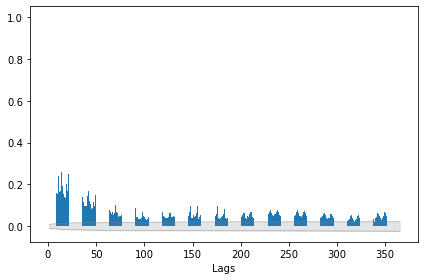

In [82]:
#AutoCorrelation Function for deaths_col
acf_values, confint = acf(deaths_col, alpha=0.05,nlags=365)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, color='grey', lw=0.3)
plt.plot(lags[1:], lower_bound, color='grey', lw=0.3)
plt.xlabel('Lags')
plt.tight_layout()

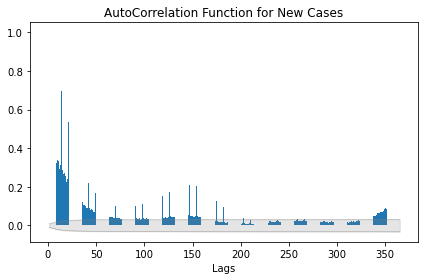

In [83]:
#AutoCorrelation Function for cases_col
acf_values, confint = acf(cases_col, alpha=0.05,nlags=365)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, color='grey', lw=0.3)
plt.plot(lags[1:], lower_bound, color='grey', lw=0.3)
plt.xlabel('Lags')
plt.title('AutoCorrelation Function for New Cases')
plt.tight_layout()

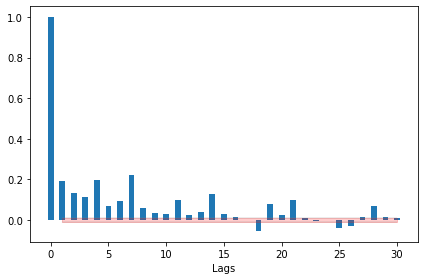

In [84]:
#PACF function for deaths_col
acf_values, confint = pacf(deaths_col, alpha=0.05,nlags=30)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, color='grey', lw=0.3)
plt.plot(lags[1:], lower_bound, color='grey', lw=0.3)
plt.xlabel('Lags')
plt.tight_layout()

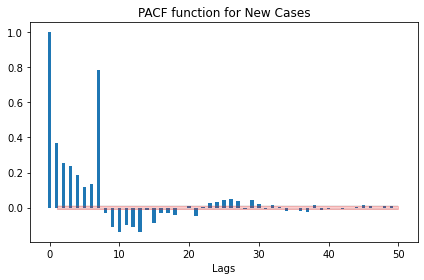

In [85]:
#PACF function for cases_col
acf_values, confint = pacf(cases_col, alpha=0.05,nlags=50)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, color='grey', lw=0.3)
plt.plot(lags[1:], lower_bound, color='grey', lw=0.3)
plt.xlabel('Lags')
plt.title('PACF function for New Cases')
plt.tight_layout()

In [87]:
#create lagged features for cases_col
df['new_cases_1 lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(1)
df['new_cases_2_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(2)
df['new_cases_3_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(3)
df['new_cases_4_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(4)
df['new_cases_7_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(7)
df['new_cases_30_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(30)
df['new_cases_50_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(50)
df['new_cases_150_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(150)
df['new_cases_350_lag'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].shift(350)

In [88]:
#create lagged features for deaths_col
df['new_deaths_1_lag'] = df['PEOPLE_DEATH_NEW_COUNT'].shift(1)
df['new_deaths_2_lag'] = df['PEOPLE_DEATH_NEW_COUNT'].shift(2)
df['new_deaths_3_lag'] = df['PEOPLE_DEATH_NEW_COUNT'].shift(3)
df['new_deaths_4_lag'] = df['PEOPLE_DEATH_NEW_COUNT'].shift(4)
df['new_deaths_7_lag'] = df['PEOPLE_DEATH_NEW_COUNT'].shift(7)
df['new_deaths_30_lag'] = df['PEOPLE_DEATH_NEW_COUNT'].shift(30)
df['new_deaths_50_lag'] = df['PEOPLE_DEATH_NEW_COUNT'].shift(50)

In [89]:
#rolling statistics vaccination data (Administered_Dose1_Recip)
df['administered_dose1_recip_10_mean'] = df['Administered_Dose1_Recip'].rolling(window = 10).mean()
df['administered_dose1_recip_50_mean'] = df['Administered_Dose1_Recip'].rolling(window = 50).mean()
df['administered_dose1_recip_100_mean'] = df['Administered_Dose1_Recip'].rolling(window = 100).mean()
df['administered_dose1_recip_10_std'] = df['Administered_Dose1_Recip'].rolling(window = 10).std()
df['administered_dose1_recip_50_std'] = df['Administered_Dose1_Recip'].rolling(window = 50).std()
df['administered_dose1_recip_100_std'] = df['Administered_Dose1_Recip'].rolling(window = 100).std()
df['administered_dose1_recip_10_max'] = df['Administered_Dose1_Recip'].rolling(window = 10).max()
df['administered_dose1_recip_50_max'] = df['Administered_Dose1_Recip'].rolling(window = 50).max()
df['administered_dose1_recip_100_max'] = df['Administered_Dose1_Recip'].rolling(window = 100).max()
df['administered_dose1_recip_10_min'] = df['Administered_Dose1_Recip'].rolling(window = 10).min()
df['administered_dose1_recip_50_min'] = df['Administered_Dose1_Recip'].rolling(window = 50).min()
df['administered_dose1_recip_100_min'] = df['Administered_Dose1_Recip'].rolling(window = 100).min()

In [90]:
#rolling statistics cases data (PEOPLE_POSITIVE_NEW_CASES_COUNT)
df['new_cases_10_mean'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 10).mean()
df['new_cases_50_mean'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 50).mean()
df['new_cases_100_mean'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 100).mean()
df['new_cases_10_std'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 10).std()
df['new_cases_50_std'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 50).std()
df['new_cases_100_std'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 100).std()
df['new_cases_10_max'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 10).max()
df['new_cases_50_max'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 50).max()
df['new_cases_100_max'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 100).max()
df['new_cases_10_min'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 10).min()
df['new_cases_50_min'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 50).min()
df['new_cases_100_min'] = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].rolling(window = 100).min()

In [91]:
#rolling statistics deaths data (PEOPLE_DEATH_NEW_COUNT)
df['new_deaths_10_mean'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 10).mean()
df['new_deaths_50_mean'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 50).mean()
df['new_deaths_100_mean'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 100).mean()
df['new_deaths_10_std'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 10).std()
df['new_deaths_50_std'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 50).std()
df['new_deaths_100_std'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 100).std()
df['new_deaths_10_max'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 10).max()
df['new_deaths_50_max'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 50).max()
df['new_deaths_100_max'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 100).max()
df['new_deaths_10_min'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 10).min()
df['new_deaths_50_min'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 50).min()
df['new_deaths_100_min'] = df['PEOPLE_DEATH_NEW_COUNT'].rolling(window = 100).min()

In [92]:
#domain knowledge feature engineering

#vaccine coverage per capita features
df['vaccination_rate_1dose'] = df['Administered_Dose1_Recip'] / df['TOT_POP']
df['vaccination_rate_complete'] = df['Series_Complete_Yes'] / df['TOT_POP']
df['booster_rate'] = df['Booster_Doses'] / df['TOT_POP']

#age group proportions
df['prop_age04'] = (df['AGE04_TOT'] / df['TOT_POP']) * 100
df['prop_age59'] = (df['AGE59_TOT'] / df['TOT_POP']) * 100
df['prop_age6064'] = (df['AGE6064_TOT'] / df['TOT_POP']) * 100
df['prop_age8084'] = (df['AGE8084_TOT'] / df['TOT_POP']) * 100
df['prop_age85plus'] = (df['AGE85PLUS_TOT'] / df['TOT_POP']) * 100

In [93]:
df.shape

(39500, 247)

In [94]:
#save df with features
df.to_csv('feat_eng_df.csv')